# QRS detection

In [1]:
import matplotlib.pyplot    as plt
import numpy                as np
import parameters
import wfdb
import socket

%matplotlib inline

# determine the paths for data/annotations based off the computer name
hostname=socket.gethostname()

if hostname=='alistair-pc70':
    data_path = '/data/challenge-2015/data/'
    ann_path = '/data/challenge-2015/ann/'
else:
    data_path = 'sample_data/challenge_training_data/'
    ann_path = 'sample_data/challenge_training_ann/'

In [2]:
# Plot signal together with annotation types on the channel for data ranging from start to end
def plot_annotations(data_path, ann_path, sample_name, ann_types_list, channel, fs, start, end): 
    sig, fields = wfdb.rdsamp(data_path + sample_name)
    time_vector = np.linspace(int(float(start)/fs), int(float(end)/fs), end-start)
        
    # Plot the time series of the signal
    plt.figure(figsize=[16, 10])
    plt.plot(time_vector, sig[start:end, channel], '-',
             color=parameters.COLORS[0], linewidth=2, 
             label=fields['signame'][channel])
    
    if len(ann_types_list) > len(parameters.MARKER_TYPES) or len(ann_types_list) > len(parameters.COLORS)-1: 
        raise RuntimeException("too many types of annotations to plot")
    
    # Plot each annotation type
    for index in range(len(ann_types_list)): 
        ann_type = ann_types_list[index]
        annotation = wfdb.rdann(ann_path + sample_name, ann_type, sampfrom = start, sampto = end)
        
        plt.plot(annotation[0] / fs, sig[annotation[0], channel],
             color=parameters.COLORS[index + 1],
             linestyle='none', linewidth=3,
             marker=parameters.MARKER_TYPES[index], markersize=12,
             label=ann_type)
        
    plt.xlabel('Time (seconds)',fontsize=16)
    plt.legend(fontsize=16)
    plt.grid()
    plt.show()

/home/liandrea/anaconda2/lib/python2.7/site-packages/wfdb/_rdann.py:209: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  AT = filebytes[bpi, 1] >> 2  # anntype
/home/liandrea/anaconda2/lib/python2.7/site-packages/wfdb/_rdann.py:53: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ts = ts + filebytes[bpi, 0] + 256 * (filebytes[bpi, 1] & 3)
/home/liandrea/anaconda2/lib/python2.7/site-packages/wfdb/_rdann.py:216: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  AT = filebytes[bpi, 1] >> 2
/home/liandrea/anaconda2/lib/python2.7/site-packages/wfdb/_rdann.py:78: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  auxlen = filebytes[bpi, 0]
/home/liandrea/anaconda2/lib/python2.7/site-packages/wfdb/_rdann.py:79: VisibleDeprecationWa

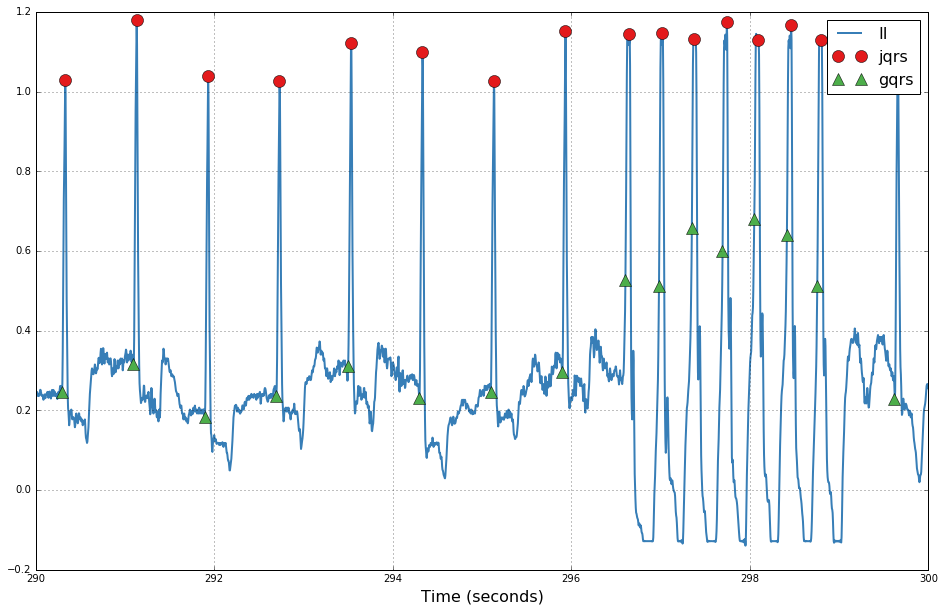

In [3]:
fs = 250.0
sample_name = 'v131l'
start = 72500
end = 75000

# choose the lead to plot (annotations are generated off the first lead)
channel = 0

# plot_annotations(data_path, ann_path, sample_name, ['gqrs', 'gqrs_old'], channel, fs, start, end)
plot_annotations(data_path, ann_path, sample_name, ['jqrs', 'gqrs'], channel, fs, start, end)

In [13]:
# Calculate RR intervals in the sample, where 
def calculate_rr_intervals(sample, fs, ann_type, start, end): 
    annotation = wfdb.rdann(sample, ann_type, sampfrom = start, sampto = end)

    # Convert annotations sample numbers into seconds if annotations in signal
    if len(annotation[0]) > 0: 
        ann_duration = annotation[0] / float(fs)
    else: 
        return [0.0]
    
    rr_intervals = np.array([])
    for index in range(1, len(ann_duration)):
        rr_intervals = np.append(rr_intervals, round(ann_duration[index] - ann_duration[index - 1], 4))
        
    return rr_intervals

sample_name = "v131l"
rr_intervals = calculate_rr_intervals(ann_path + sample_name, fs, 'jqrs', start, end)
if len(rr_intervals) > 0: 
    print "average: ", sum(rr_intervals) / len(rr_intervals)
print "rr_intervals", rr_intervals
        

(array([72583, 72783, 72983, 73183, 73383, 73583, 73783, 73983, 74163,
       74255, 74345, 74435, 74522, 74615, 74698, 74914]), ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], 250)
average:  0.6216
rr_intervals [ 0.8    0.8    0.8    0.8    0.8    0.8    0.8    0.72   0.368  0.36   0.36
  0.348  0.372  0.332  0.864]
